### Chapter 03

#### height-income-distributions

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/height-income-distributions/clean/"
data_out = dirname + "da_case_studies/ch03-distributions-height-income/"
output = dirname + "da_case_studies/ch03-distributions-height-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

##### load in clean and tidy data and create workfile

In [4]:
hrs = pd.read_csv(data_in + "hrs_height_income.csv")

In [5]:
hrs["rheight"] = hrs["rheight"].apply(pd.to_numeric, errors="coerce")

In [6]:
filtered_women = hrs.query(
    "age >= 55 & age < 60 & female == 1 & rheight > 1.3 & rheight < 2.1"
)

In [7]:
hrs.rheight.describe()

count    15597.000000
mean         1.681240
std          0.103433
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.057400
Name: rheight, dtype: float64

##### graph --height

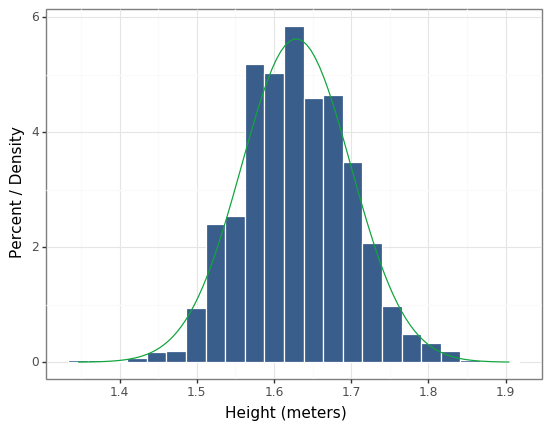

<ggplot: (8737484308776)>

In [8]:
ggplot(filtered_women, aes(x="rheight")) + geom_histogram(
    aes(y="stat(density)"), bins=23, fill=color[0], color="white", alpha=0.8,
) + stat_function(
    fun=norm.pdf,
    colour=color[1],
    args=[np.mean(filtered_women["rheight"]), np.std(filtered_women["rheight"])],
) + theme_bw() + ylab(
    "Percent / Density"
) + xlab(
    "Height (meters)"
)

##### LOGNORMAL: family income of women age 55-59 

#### income variable

In [9]:
hrs["income"] = hrs["hitot"] / 1000

In [10]:
# filter dataset
filtered_women_income = hrs.query(
    "age >= 55 & age < 60 & female == 1 & income > 1 & income < 1000"
)

In [11]:
filtered_women_income["income"].describe()

count    1914.000000
mean       74.857567
std        86.939084
min         1.200000
25%        19.706000
50%        48.000000
75%       100.011625
max       949.000000
Name: income, dtype: float64

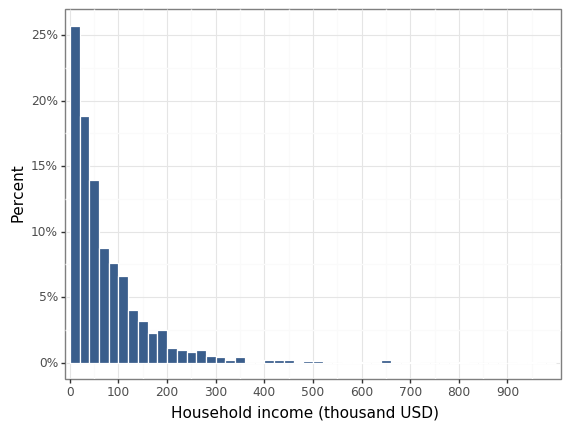

<ggplot: (8737444881728)>

In [12]:
ggplot(filtered_women_income, aes(x="income")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    binwidth=20,
    boundary=0,
    fill=color[0],
    color="white",
    alpha=0.8,
) + ylab("Percent") + xlab("Household income (thousand USD)") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 1000), breaks=seq(0, 1000, by=100)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 0.3, by=0.05), labels=percent_format()
) + theme_bw()

In [13]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["income"])

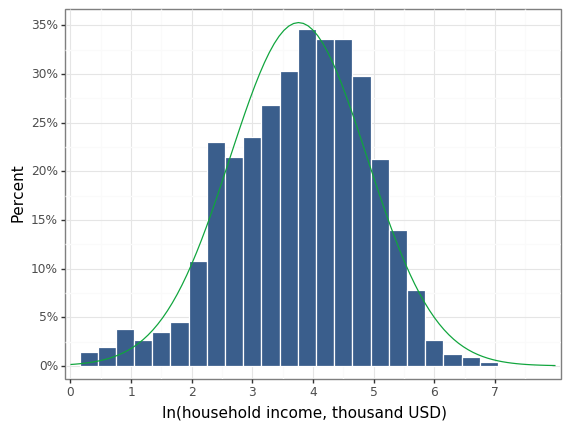

<ggplot: (8737444829959)>

In [14]:
ggplot(filtered_women_income, aes(x="lnincome")) + geom_histogram(
    aes(y="stat(density)"), binwidth=0.3, fill=color[0], color="white", alpha=0.8
) + stat_function(
    fun=norm.pdf,
    colour=color[1],
    args=[
        np.mean(filtered_women_income["lnincome"]),
        np.std(filtered_women_income["lnincome"]),
    ],
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 8), breaks=seq(0, 8, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 0.4, by=0.05), labels=percent_format()
) + ylab(
    "Percent"
) + xlab(
    "ln(household income, thousand USD)"
) + theme_bw()